## Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

## Data Preprocessing

In [2]:
data=pd.read_csv('train_data.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
## Filling the numerical missing value with the mean of that
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mean())

In [10]:
data['Gender'].mode()[0]

'Male'

In [11]:
## Filling the categorical missing value with the mode of that
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [12]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
df=data.copy()

## EDA (Exploratory Data Analysis)

## Univariate Data Analysis

In [14]:
data['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

Text(0, 0.5, 'Count')

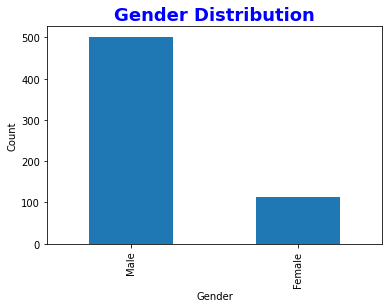

In [15]:
data['Gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution',fontsize=18,fontweight='bold',color='blue')
plt.xlabel('Gender')
plt.ylabel('Count')

In [16]:
data['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

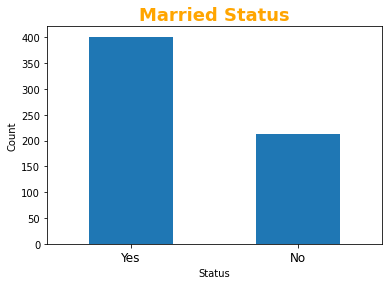

In [17]:
data['Married'].value_counts().plot(kind='bar')
plt.title('Married Status',fontsize=18,fontweight='bold',color='orange')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=360,fontsize=12)

In [18]:
data['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Text(0.5, 1.0, 'Number of Dependents')

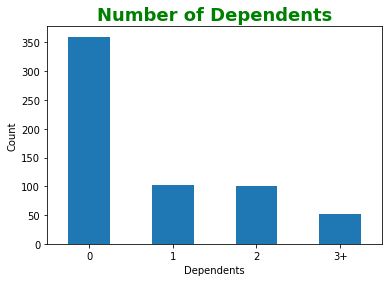

In [19]:
data['Dependents'].value_counts().plot(kind='bar')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.xticks(rotation=360)
plt.title('Number of Dependents',fontsize=18,fontweight='bold',color='green')

In [20]:
data['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

(array([0, 1]), [Text(0, 0, 'Graduate'), Text(1, 0, 'Not Graduate')])

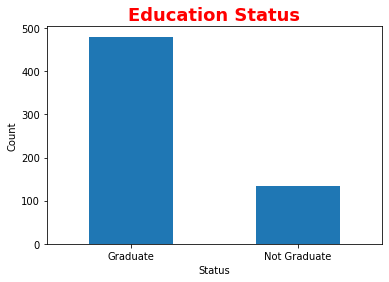

In [21]:
data['Education'].value_counts().plot(kind='bar')
plt.title('Education Status',fontsize=18,fontweight='bold',color='red')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=360)

In [22]:
data['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

Text(0.5, 1.0, 'Employement Status')

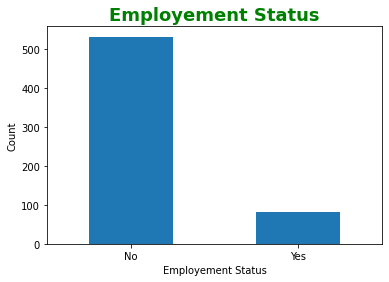

In [23]:
data['Self_Employed'].value_counts().plot(kind='bar')
plt.xlabel('Employement Status')
plt.ylabel('Count')
plt.xticks(rotation=360)
plt.title('Employement Status',fontsize=18,fontweight='bold',color='green')

In [24]:
data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Text(0.5, 1.0, 'Property Status')

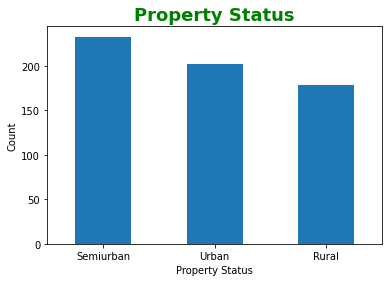

In [25]:
data['Property_Area'].value_counts().plot(kind='bar')
plt.xlabel('Property Status')
plt.ylabel('Count')
plt.xticks(rotation=360)
plt.title('Property Status',fontsize=18,fontweight='bold',color='green')

## Bivariate Data Analysis

In [26]:
## Effect of gender on loan_status

In [27]:
data.groupby(['Gender','Loan_Status'])['Loan_Status'].count()

Gender  Loan_Status
Female  N               37
        Y               75
Male    N              155
        Y              347
Name: Loan_Status, dtype: int64

Text(0, 0.5, 'Count')

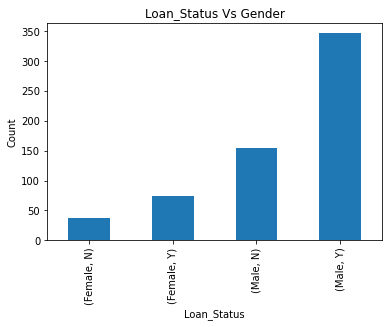

In [28]:
data.groupby(['Gender','Loan_Status'])['Loan_Status'].count().plot(kind='bar')
plt.title('Loan_Status Vs Gender')
plt.xlabel('Loan_Status')
plt.ylabel('Count')

In [29]:
## Effect of Married Status on Loan_status

In [30]:
data.groupby(['Married','Loan_Status'])['Loan_Status'].count()

Married  Loan_Status
No       N               79
         Y              134
Yes      N              113
         Y              288
Name: Loan_Status, dtype: int64

Text(0, 0.5, 'Count')

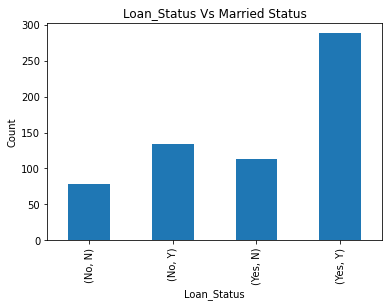

In [31]:
data.groupby(['Married','Loan_Status'])['Loan_Status'].count().plot(kind='bar')
plt.title('Loan_Status Vs Married Status')
plt.xlabel('Loan_Status')
plt.ylabel('Count')

In [32]:
##Effect of Number of Dependents on Loan_status

In [33]:
data.groupby(['Dependents','Loan_Status'])['Loan_Status'].count()

Dependents  Loan_Status
0           N              113
            Y              247
1           N               36
            Y               66
2           N               25
            Y               76
3+          N               18
            Y               33
Name: Loan_Status, dtype: int64

Text(0, 0.5, 'Count')

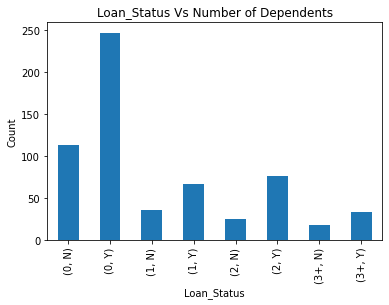

In [34]:
data.groupby(['Dependents','Loan_Status'])['Loan_Status'].count().plot(kind='bar')
plt.title('Loan_Status Vs Number of Dependents')
plt.xlabel('Loan_Status')
plt.ylabel('Count')

In [35]:
## Effect of Self_employment on loan Status
data.groupby(['Self_Employed','Loan_Status'])['Loan_Status'].count()

Self_Employed  Loan_Status
No             N              166
               Y              366
Yes            N               26
               Y               56
Name: Loan_Status, dtype: int64

Text(0, 0.5, 'Count')

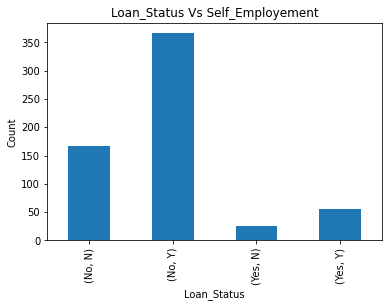

In [36]:
data.groupby(['Self_Employed','Loan_Status'])['Loan_Status'].count().plot(kind='bar')
plt.title('Loan_Status Vs Self_Employement')
plt.xlabel('Loan_Status')
plt.ylabel('Count')

In [37]:
## Effect of Property Area on Loan Status
data.groupby(['Property_Area','Loan_Status'])['Loan_Status'].count()

Property_Area  Loan_Status
Rural          N               69
               Y              110
Semiurban      N               54
               Y              179
Urban          N               69
               Y              133
Name: Loan_Status, dtype: int64

Text(0, 0.5, 'Count')

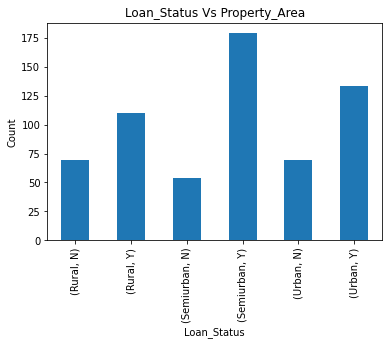

In [38]:
data.groupby(['Property_Area','Loan_Status'])['Loan_Status'].count().plot(kind='bar')
plt.title('Loan_Status Vs Property_Area')
plt.xlabel('Loan_Status')
plt.ylabel('Count')

## Normalizing the data

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

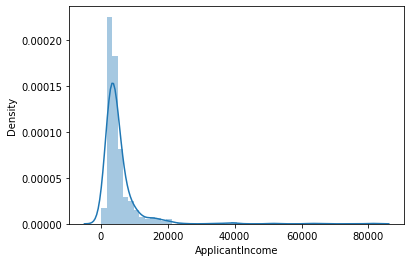

In [39]:
sns.distplot(data['ApplicantIncome'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

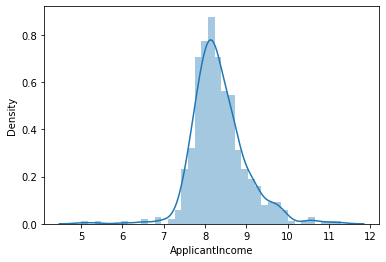

In [40]:
data['ApplicantIncome']=np.log(data['ApplicantIncome'])
sns.distplot(data['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

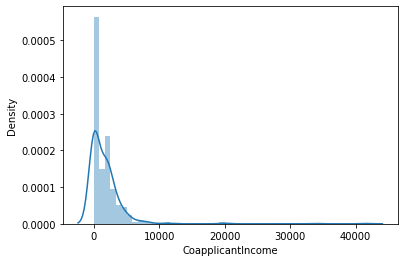

In [41]:
sns.distplot(data['CoapplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

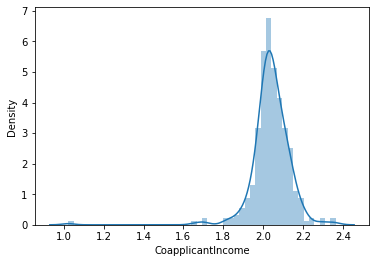

In [43]:
data['CoapplicantIncome']=np.log(data['CoapplicantIncome'])
sns.distplot(data['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

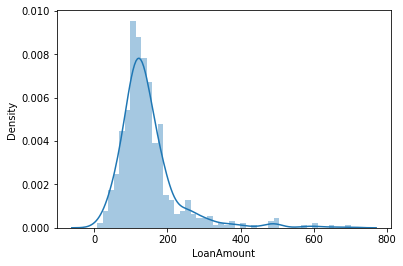

In [44]:
sns.distplot(data['LoanAmount'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

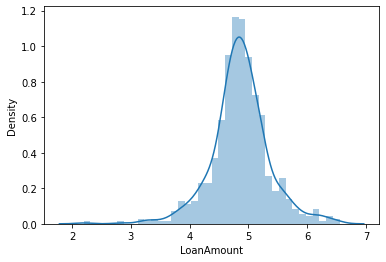

In [45]:
data['LoanAmount']=np.log(data['LoanAmount'])
sns.distplot(data['LoanAmount'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

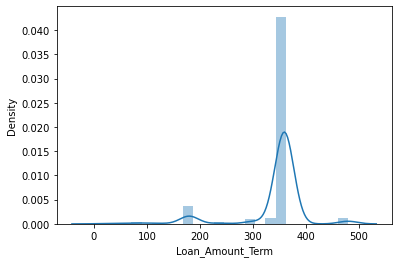

In [46]:
sns.distplot(data['Loan_Amount_Term'])

In [47]:
## Correlation plot
data_corr=data.corr()
data_corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,0.021921,0.491066,-0.030739,0.019169
CoapplicantIncome,0.021921,1.000000,0.356187,-0.067643,-0.066682
LoanAmount,0.491066,0.356187,1.000000,0.086531,-0.025248
Loan_Amount_Term,-0.030739,-0.067643,0.086531,1.000000,0.001395
Credit_History,0.019169,-0.066682,-0.025248,0.001395,1.000000


<AxesSubplot:>

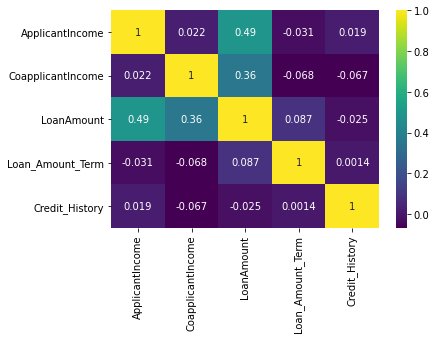

In [48]:
sns.heatmap(data_corr,annot=True,cmap='viridis')

In [49]:
# droping unnecessary columns
data.drop(['Loan_ID','CoapplicantIncome'],axis=1,inplace=True)

In [50]:
## Separating features and labels

In [51]:
x=data.drop('Loan_Status',axis=1)
y=data['Loan_Status']

In [52]:
y=pd.get_dummies(y,drop_first=True)

In [53]:
##Train-Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [55]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,8.674026,4.986426,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,8.430109,4.852030,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,8.006368,4.189655,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,7.856707,4.787492,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,8.699515,4.948760,360.0,1.0,Urban,Y


In [56]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [57]:
## Label Encoding
def predict(model):
    # Define Models Name
    print('Model: {}'.format(model))
    step1 = ColumnTransformer(transformers=[
        ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,3,4,9])
                                            ],remainder='passthrough')

    step2 = model

    pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
    ])

    pipe.fit(x_train,y_train)

    y_pred = pipe.predict(x_test)
    print('Accuracy : {}'.format(accuracy_score(y_test,y_pred)))
    print('Confusion_matrix : {}'.format(confusion_matrix(y_test,y_pred)))
    print('Classification Report : {}'.format(classification_report(y_test,y_pred)))


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [59]:
predict(LogisticRegression())

Model: LogisticRegression()
Accuracy : 0.8130081300813008
Confusion_matrix : [[21 21]
 [ 2 79]]
Classification Report :               precision    recall  f1-score   support

           0       0.91      0.50      0.65        42
           1       0.79      0.98      0.87        81

    accuracy                           0.81       123
   macro avg       0.85      0.74      0.76       123
weighted avg       0.83      0.81      0.80       123



In [60]:
predict(GaussianNB())

Model: GaussianNB()
Accuracy : 0.7723577235772358
Confusion_matrix : [[23 19]
 [ 9 72]]
Classification Report :               precision    recall  f1-score   support

           0       0.72      0.55      0.62        42
           1       0.79      0.89      0.84        81

    accuracy                           0.77       123
   macro avg       0.75      0.72      0.73       123
weighted avg       0.77      0.77      0.76       123



In [61]:
predict(SGDClassifier())

Model: SGDClassifier()
Accuracy : 0.6585365853658537
Confusion_matrix : [[ 0 42]
 [ 0 81]]
Classification Report :               precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.66      1.00      0.79        81

    accuracy                           0.66       123
   macro avg       0.33      0.50      0.40       123
weighted avg       0.43      0.66      0.52       123



In [62]:
predict(KNeighborsClassifier())

Model: KNeighborsClassifier()
Accuracy : 0.7317073170731707
Confusion_matrix : [[16 26]
 [ 7 74]]
Classification Report :               precision    recall  f1-score   support

           0       0.70      0.38      0.49        42
           1       0.74      0.91      0.82        81

    accuracy                           0.73       123
   macro avg       0.72      0.65      0.65       123
weighted avg       0.72      0.73      0.71       123



In [63]:
predict(DecisionTreeClassifier())

Model: DecisionTreeClassifier()
Accuracy : 0.6829268292682927
Confusion_matrix : [[26 16]
 [23 58]]
Classification Report :               precision    recall  f1-score   support

           0       0.53      0.62      0.57        42
           1       0.78      0.72      0.75        81

    accuracy                           0.68       123
   macro avg       0.66      0.67      0.66       123
weighted avg       0.70      0.68      0.69       123



In [64]:
predict(RandomForestClassifier())

Model: RandomForestClassifier()
Accuracy : 0.8373983739837398
Confusion_matrix : [[25 17]
 [ 3 78]]
Classification Report :               precision    recall  f1-score   support

           0       0.89      0.60      0.71        42
           1       0.82      0.96      0.89        81

    accuracy                           0.84       123
   macro avg       0.86      0.78      0.80       123
weighted avg       0.85      0.84      0.83       123



In [65]:
predict(SVC())

Model: SVC()
Accuracy : 0.6585365853658537
Confusion_matrix : [[ 0 42]
 [ 0 81]]
Classification Report :               precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.66      1.00      0.79        81

    accuracy                           0.66       123
   macro avg       0.33      0.50      0.40       123
weighted avg       0.43      0.66      0.52       123



In [66]:
predict(XGBClassifier())

Model: XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)
[20:31:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy : 0.7642276422764228
Confusion_matrix : [[

In [67]:
predict(AdaBoostClassifier())

Model: AdaBoostClassifier()
Accuracy : 0.8048780487804879
Confusion_matrix : [[23 19]
 [ 5 76]]
Classification Report :               precision    recall  f1-score   support

           0       0.82      0.55      0.66        42
           1       0.80      0.94      0.86        81

    accuracy                           0.80       123
   macro avg       0.81      0.74      0.76       123
weighted avg       0.81      0.80      0.79       123



We can see that Logistic Regression performs the best with 83%  Accuracy

In [72]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [74]:
step1 = ColumnTransformer(transformers=[
        ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,3,4,9])
                                            ],remainder='passthrough')

step2 = LogisticRegression()


model = Pipeline([
    ('step1',step1),
    ('step2',step2)
    ])

model.fit(x_train,y_train)

y_pred = model.predict(x_test)
print('accuracy',accuracy_score(y_test,y_pred))

accuracy 0.8130081300813008


In [70]:
import pickle
pickle.dump(model,open('model.pkl','wb'))

In [71]:
y

,Y
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1
